<a href="https://colab.research.google.com/github/kunakl07/Backend-of-Active-Learning/blob/pre_spec_al/Case_two/Training/training_on_PCEN_spectrograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!zip -r /content/pcentrainsave.zip /content/Round2_OS_07_05/train

In [ ]:
!zip -r /content/pcentest.zip /content/Round2_OS_07_05/test

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys, numpy
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, Input
from keras import callbacks, regularizers
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.engine import  Model
from keras.layers import Conv2D, GlobalAveragePooling2D
from sklearn import metrics

Using TensorFlow backend.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report

In [ ]:
import matplotlib
matplotlib.use("Agg")

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [ ]:
train_path='/content/Round2_OS_07_05/train'
test_path='/content/Round2_OS_07_05/test'

In [ ]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['calls','nocalls'])
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['calls','nocalls'])


Found 1214 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [ ]:
import keras

In [ ]:
vgg16_model=keras.applications.vgg16.VGG16()


553467904/553467096 [==============================] - 17s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
vgg16_model = keras.applications.vgg16.VGG16()
model = Sequential()
for layer in vgg16_model.layers[:-1]: # just exclude last layer from copying
  model.add(layer)
for layer in model.layers:
  layer.trainable = False
#model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
for layer in model.layers:
    layer.trainable=False

In [ ]:
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
import tensorflow as tf

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=False
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=optimizer,
	metrics=["accuracy"])

In [ ]:
%cd /content/

/content


In [ ]:
model.fit_generator(train_batches,steps_per_epoch=200,epochs=250,verbose=2)
model.save('PCEN_VGG_Srkw.h5')
from google.colab import files
files.download('PCEN_VGG_Srkw.h5') 

Epoch 1/250
 - 71s - loss: 0.0034 - accuracy: 1.0000
Epoch 2/250
 - 71s - loss: 0.0034 - accuracy: 1.0000
Epoch 3/250
 - 70s - loss: 0.0031 - accuracy: 1.0000
Epoch 4/250
 - 67s - loss: 0.0026 - accuracy: 1.0000
Epoch 5/250
 - 67s - loss: 0.0025 - accuracy: 1.0000
Epoch 6/250
 - 70s - loss: 0.0022 - accuracy: 1.0000
Epoch 7/250
 - 70s - loss: 0.0021 - accuracy: 1.0000
Epoch 8/250
 - 67s - loss: 0.0018 - accuracy: 1.0000
Epoch 9/250
 - 70s - loss: 0.0022 - accuracy: 1.0000
Epoch 10/250
 - 71s - loss: 0.0019 - accuracy: 1.0000
Epoch 11/250
 - 71s - loss: 0.0015 - accuracy: 1.0000
Epoch 12/250
 - 71s - loss: 0.0014 - accuracy: 1.0000
Epoch 13/250
 - 71s - loss: 0.0012 - accuracy: 1.0000
Epoch 14/250
 - 71s - loss: 0.0012 - accuracy: 1.0000
Epoch 15/250
 - 71s - loss: 0.0010 - accuracy: 1.0000
Epoch 16/250
 - 72s - loss: 9.9557e-04 - accuracy: 1.0000
Epoch 17/250
 - 71s - loss: 9.7710e-04 - accuracy: 1.0000
Epoch 18/250
 - 71s - loss: 8.8034e-04 - accuracy: 1.0000
Epoch 19/250
 - 71s - los

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


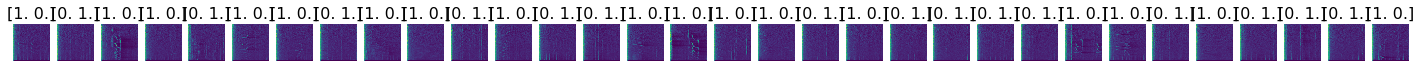

In [ ]:

# plot function, used to plot images with labels within jupyter notebook
def plots(ims, figsize=(25,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims= np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

imgs, labels = next(train_batches)

# we plot these samples of images and their labels 1 batch at a time.
plots(imgs, titles=labels)

In [ ]:
predictions=model.predict_generator(test_batches,steps=225,verbose=0)

In [ ]:
predictions[0:10]

array([[9.99991298e-01, 8.71824795e-06],
       [2.13050004e-03, 9.97869492e-01],
       [9.99998331e-01, 1.63876246e-06],
       [1.12074837e-02, 9.88792479e-01],
       [6.36980589e-03, 9.93630230e-01],
       [5.06480597e-02, 9.49351966e-01],
       [5.92560042e-03, 9.94074404e-01],
       [1.10184075e-02, 9.88981605e-01],
       [9.97266293e-01, 2.73372536e-03],
       [9.99738157e-01, 2.61883310e-04]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


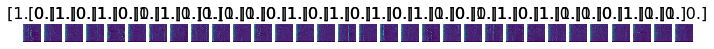

In [ ]:
# we plot these samples of images and their labels 1 batch at a time.
plots(imgs, titles=labels)